Having created a file with Gaia/SDSS photometry with notebook LSST-Bright-Gaia-SDSS-Query, we will now do out analysis and make plots!


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
from astropy.table import Table

filename='LSST-Gaia-SDSS-11-20-50000.fits'
results = Table.read(filename)

In [4]:
#one bad thing is that the no data fields become 1e20. 

In [5]:
results

source_id,ra,dec,parallax,parallax_over_error,phot_g_mean_mag,bp_rp,l,b,psfmag_u,psfmag_g,psfmag_r,psfmag_i,psfmag_z
,deg,deg,mas,,mag,mag,deg,deg,mag,mag,mag,mag,mag
int64,float64,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32
2527251395117323264,10.519780593282448,-4.976175816740428,0.7370854056559581,20.000017,15.227292,0.69368553,116.7696735753734,-67.73588088714652,16.49564,15.57428,15.24819,15.08331,15.11901
3040375261144507776,115.0089704468592,-10.500688308505614,0.48714949916953704,20.000065,14.749246,1.1341114,227.8761692270541,5.800838975577844,17.16281,15.41704,14.71707,14.46766,14.27166
4272322858328849536,279.27863056883166,-0.5481982978595297,1.5854916169962927,20.000065,16.959112,2.2771015,30.80909415937436,2.9360123499345656,21.44375,18.93933,17.25084,16.37815,15.74219
3062384803870463488,112.17210751458649,-0.6873186039646602,0.6480629723635686,20.00009,15.456643,0.9040232,217.82410162983325,7.9633040324299165,17.38025,15.92351,15.42516,15.26737,15.1846
4371913494833828224,266.3412592994911,-0.7149530419862612,0.724216422503873,20.000124,15.517196,1.3794241,24.579962090182278,14.31970055834716,18.15526,16.40991,15.50224,15.05362,14.88797
3202347819423779584,63.98408028956097,-6.374393802735024,3.3907395828222424,20.000143,18.245455,2.869442,199.4417468912811,-37.28314404550823,23.34902,20.5087,18.96868,17.49903,16.73373
3062891713088285056,123.65104066279324,-8.040622103797919,0.9243763479253361,20.00015,16.063435,1.227767,230.03065443813898,14.420230500503239,19.08055,16.8556,16.05503,15.67504,15.57761
4138636155783466240,260.9803428989634,-13.0529903964696,0.4509448379942598,20.00016,14.044386,1.8182821,10.861127649144152,12.71488732400112,18.57714,15.51506,14.07824,15.82344,13.11004


Text(0, 0.5, 'dec (deg ICRS)')

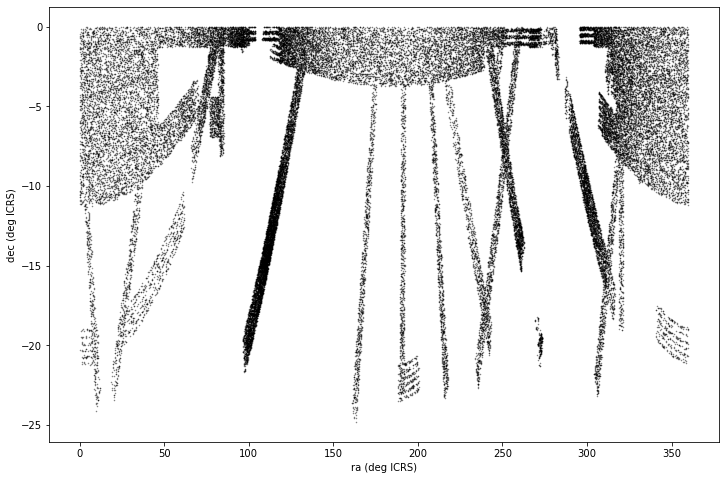

In [6]:
#Let's look at position on the sky, just to check
ra=results['ra']
dec=results['dec']

plt.plot(ra,dec, 'ko',alpha=0.5,markersize=0.5)
plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)')

Our query has selected (apparently) random sources. SDSS was a primarily northern survey so our choice to ick southern data may be questionable, there's an odd sky distribution.

Text(0, 0.5, 'b (deg Galactic)')

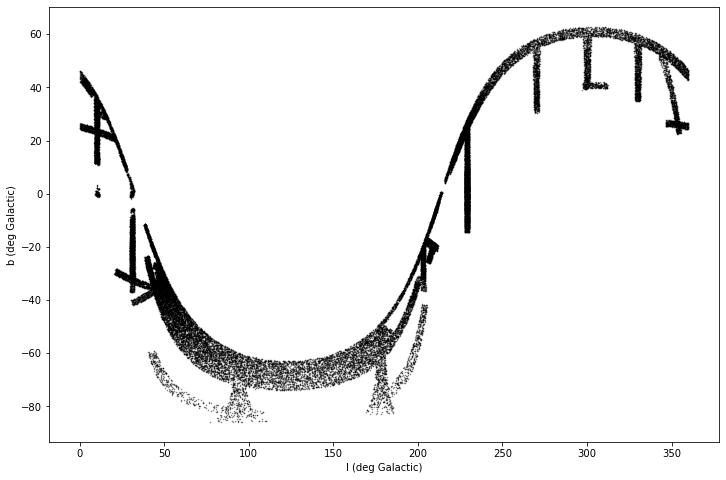

In [7]:
l=results['l']
b=results['b']

plt.plot(l,b, 'ko',alpha=0.5,markersize=0.5)
plt.xlabel('l (deg Galactic)')
plt.ylabel('b (deg Galactic)')

In [8]:
dm = 5.0*np.log10(1000.0/results['parallax'])-5.0
absmag_g = results['psfmag_g']-dm
absmag_r = results['psfmag_r']-dm
absmag_i = results['psfmag_i']-dm
absmag_z = results['psfmag_z']-dm
absmag_u = results['psfmag_u']-dm
col_gi = results['psfmag_g'] - results['psfmag_i']
col_ri = results['psfmag_r'] - results['psfmag_i']
col_iz = results['psfmag_i'] - results['psfmag_z']
col_ug = results['psfmag_u'] - results['psfmag_g']
mag_g=results['psfmag_g']
mag_r=results['psfmag_r']
mag_i=results['psfmag_i']
mag_z=results['psfmag_z']
mag_u=results['psfmag_u']

(11.0, 23.0)

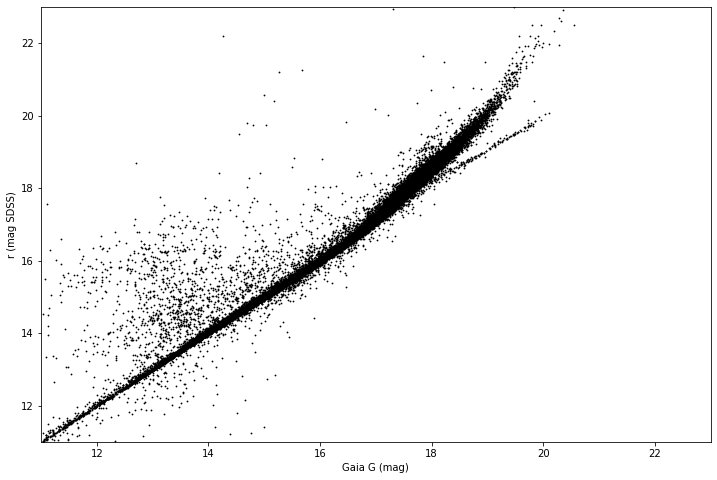

In [9]:
#check on Gaia - PS1 correlation. 
plt.plot(results['phot_g_mean_mag'],mag_r,'ko',markersize=0.8)
plt.xlabel('Gaia G (mag)')
plt.ylabel('r (mag SDSS)')
plt.ylim(11.0,23.0)
plt.xlim(11.0,23.0)

Gaia magnitude (the broad-band G) is correlated with PS1 r magnitude, as we would hope. There's some outliers for brightish Gaia stars that we need to worry a little about, but for the most part it looks good.

(0.1, 5.0)

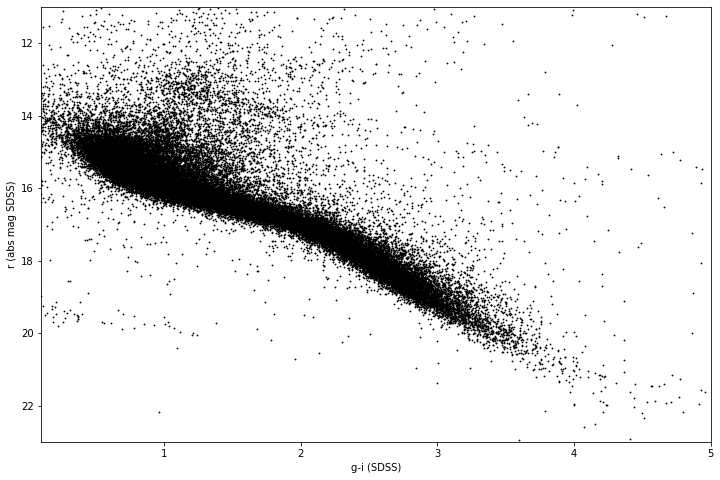

In [10]:
#check color mag PS1 correlation. 
plt.plot(col_gi,mag_r,'ko',markersize=0.8)
plt.xlabel('g-i (SDSS)')
plt.ylabel('r (abs mag SDSS)')
plt.ylim(23,11.0)
plt.xlim(0.1,5)
#start at 0.1 because 1e20 problem is not masked yet.


In [11]:
#LSST saturation for 15 second exposure in 0.7 arcsec seeing according to LSST Science Book
#u, g, r, i, z, y =
#14.7, 15.7, 15.8, 15.8, 15.3 and 13.9
bright15=[14.7,15.7,15.8,15.8,15.3,13.9]
bright30=bright15+2.5*np.log10(30.0/15.0)
bright01=bright15+2.5*np.log10(1.0/15.0)
bright03=bright15+2.5*np.log10(3.0/15.0)
bright05=bright15+2.5*np.log10(5.0/15.0)
#August 2020 report includes simulations of 1s and 5s short exposures. 
# See page 40, PSTN-051 https://pstn-051.lsst.io


In [12]:
#look at this just to make sure it went the right direction.  
bright01


array([11.75977185, 12.75977185, 12.85977185, 12.85977185, 12.35977185,
       10.95977185])

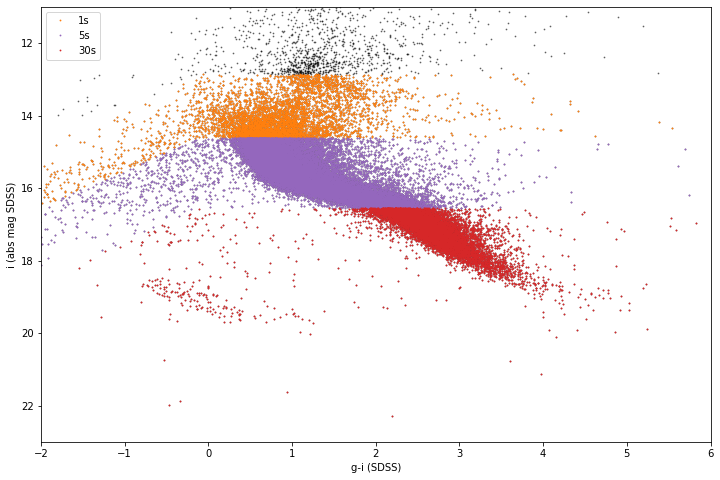

In [13]:
igood = (mag_i > bright30[3]) & (mag_g > bright30[1])
ishort = (mag_i > bright05[3]) & (mag_g > bright05[1]) & ((mag_i < bright30[3]) | (mag_g < bright30[1]))
iveryshort = (mag_i > bright01[3]) & (mag_g > bright01[1]) & ((mag_i < bright05[3]) | (mag_g < bright05[1]))
#
plt.plot(col_gi,mag_i,'ko',markersize=0.8,alpha=0.5)
plt.plot(col_gi[iveryshort],mag_i[iveryshort],'o',color='C1',markersize=0.8,label='1s')
plt.plot(col_gi[ishort],mag_i[ishort],'o',color='C4',markersize=0.8,label='5s')
plt.plot(col_gi[igood],mag_i[igood],'o',color='C3',markersize=0.8,label='30s')
plt.xlabel('g-i (SDSS)')
plt.ylabel('i (abs mag SDSS)')
plt.ylim(23,11.0)
plt.xlim(-2,6)
plt.legend();

The colors here show that our selection is working... the faint stars (red) will not be saturated in a 30s exposoure, the others will. The purple become unsaturated in the 5s exposure. Orange stars are only unsaturated in the 1s exposure. Note the the parallax error ratio cut imposes an implicit distance limit so this is not a fir representation of all stars observed by Gaia, PS1 or LSST.  

From now on, let's look at absolute magnitudes. Warning: Reddening is significant as you can see in the broad main sequence, especially for the bluer (g,r) colors.

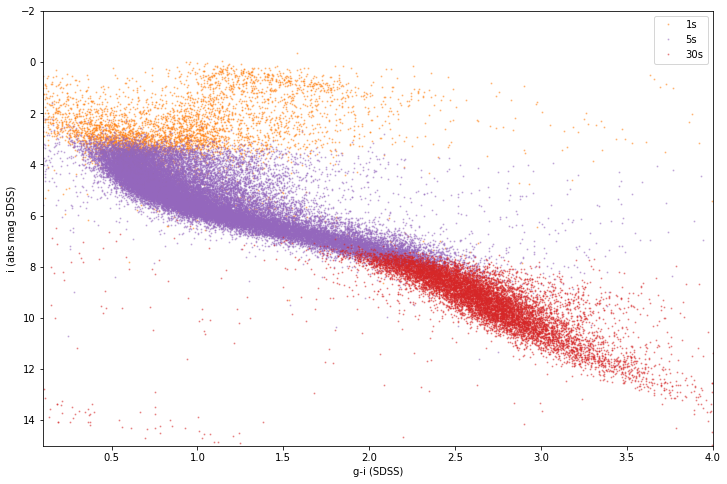

In [14]:
igood = (mag_i > bright30[3]) & (mag_g > bright30[1])
ishort = (mag_i > bright05[3]) & (mag_g > bright05[1]) & ((mag_i < bright30[3]) | (mag_g < bright30[1]))
iveryshort = (mag_i > bright01[3]) & (mag_g > bright01[1]) & ((mag_i < bright05[3]) | (mag_g < bright05[1]))
#
#plt.plot(col_gi,absmag_i,'ko',markersize=0.5,alpha=0.1)
plt.plot(col_gi[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=1,label='1s',alpha=0.4)
plt.plot(col_gi[ishort],absmag_i[ishort],'o',color='C4',markersize=1,label='5s',alpha=0.4)
plt.plot(col_gi[igood],absmag_i[igood],'o',color='C3',markersize=1,label='30s',alpha=0.4)
plt.xlabel('g-i (SDSS)')
plt.ylabel('i (abs mag SDSS)')
plt.ylim(15,-2.0)
plt.xlim(0.1,4)
plt.legend();

The key results are that M dwarfs (and white dwarfs) with high quality parallaxes will be the only ones that the main LSST survey (30s exposure) will directly measure. (They're within 500 pc, see plots below.) If we want a high quality sample of GK dwarfs directly on the LSST system with Gaia parallaxes (or similar ancillary data), then we need the 5s exposures. The 1s would extend up to the main sequence turnoff, F stars, etc.  SkyMapper DR2 is fairly shallow compared to PS1.

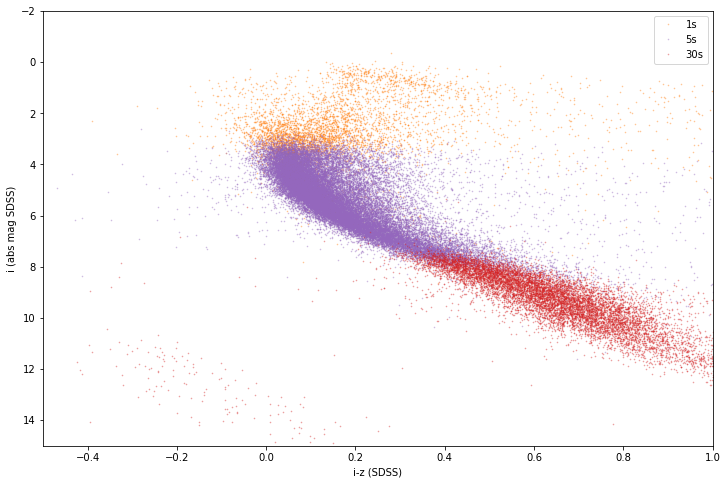

In [15]:
igood = (mag_i > bright30[3]) & (mag_z > bright30[4])
ishort = (mag_i > bright05[3]) & (mag_z > bright05[4]) & ((mag_i < bright30[3]) | (mag_z < bright30[4]))
iveryshort = (mag_i > bright01[3]) & (mag_z > bright01[4]) & ((mag_i < bright05[3]) | (mag_z < bright05[4]))
#
#plt.plot(col_iz,absmag_i,'ko',markersize=0.6,alpha=0.1)
plt.plot(col_iz[iveryshort],absmag_i[iveryshort],'o',color='C1',markersize=0.6,label='1s',alpha=0.4)
plt.plot(col_iz[ishort],absmag_i[ishort],'o',color='C4',markersize=0.6,label='5s',alpha=0.4)
plt.plot(col_iz[igood],absmag_i[igood],'o',color='C3',markersize=0.6,label='30s',alpha=0.4)
plt.xlabel('i-z (SDSS)')
plt.ylabel('i (abs mag SDSS)')
plt.ylim(15,-2.0)
plt.xlim(-0.5,1)
plt.legend();

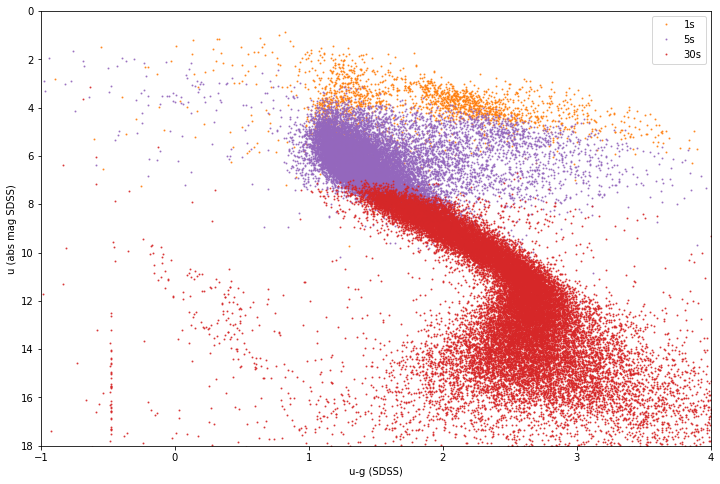

In [16]:
igood = (mag_g > bright30[1]) & (mag_u > bright30[0])
ishort = (mag_g > bright05[1]) & (mag_u > bright05[0]) & ((mag_g < bright30[1]) | (mag_u < bright30[0]))
iveryshort = (mag_g > bright01[1]) & (mag_u > bright01[0]) & ((mag_g < bright05[1]) | (mag_u < bright05[0]))
#
#plt.plot(col_iy,absmag_i,'ko',markersize=0.8,alpha=0.1)
plt.plot(col_ug[iveryshort],absmag_u[iveryshort],'o',color='C1',markersize=1,label='1s',alpha=0.8)
plt.plot(col_ug[ishort],absmag_u[ishort],'o',color='C4',markersize=1,label='5s',alpha=0.8)
plt.plot(col_ug[igood],absmag_u[igood],'o',color='C3',markersize=1,label='30s',alpha=0.8)
plt.xlabel('u-g (SDSS)')
plt.ylabel('u (abs mag SDSS)')
plt.ylim(18,0.0)
plt.xlim(-1,4)
plt.legend()

Here we see, I think, that the M dwarf unsaturated sequence has moved up into the K dwarfs. But I don't know a lot about u band. If it is to be used as a metallicity indicator for G dwarfs then you'd want the 5s data.

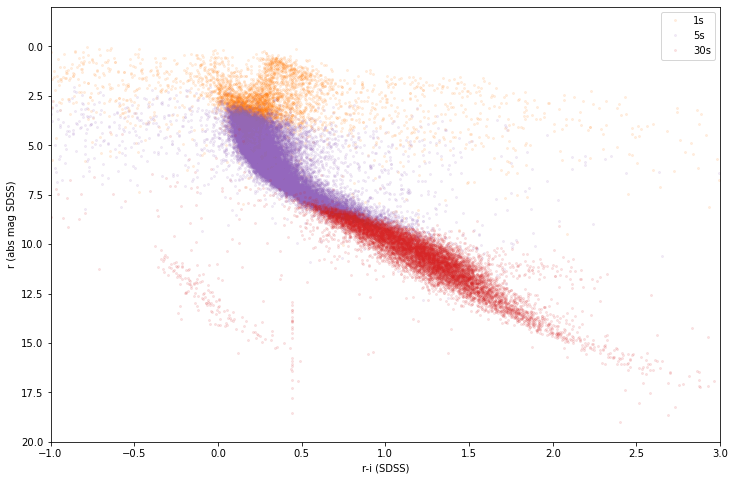

In [17]:
igood = (mag_i > bright30[3]) & (mag_r > bright30[2])
ishort = (mag_i > bright05[3]) & (mag_r > bright05[2]) & ((mag_i < bright30[3]) | (mag_r < bright30[2]))
iveryshort = (mag_i > bright01[3]) & (mag_r > bright01[2]) & ((mag_i < bright05[3]) | (mag_r < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(col_ri[iveryshort],absmag_r[iveryshort],'o',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(col_ri[ishort],absmag_r[ishort],'o',color='C4',markersize=2,label='5s',alpha=0.1)
plt.plot(col_ri[igood],absmag_r[igood],'o',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r-i (SDSS)')
plt.ylabel('r (abs mag SDSS)')
plt.ylim(20,-2.0)
plt.xlim(-1,3)
plt.legend();
#plt.savefig('LSST-Gaia-SDSS-ri-mr.png');

In [18]:
mask_not_plane=(np.abs(results['b'])> 20) 

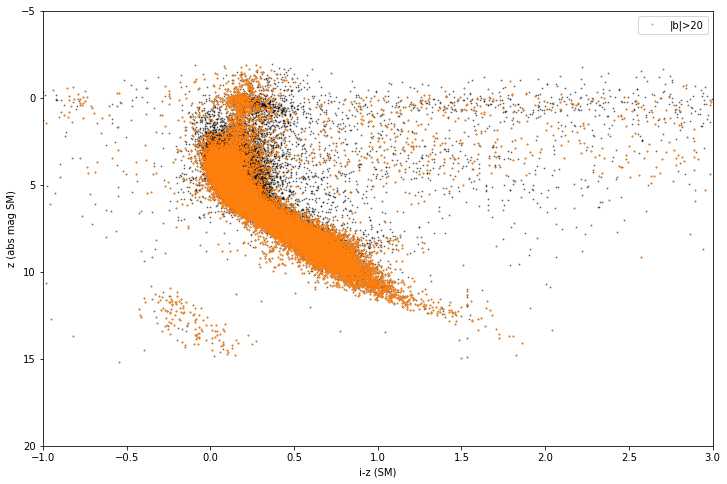

In [19]:
plt.plot(col_iz,absmag_z,'ko',markersize=0.8,alpha=0.5)
plt.plot(col_iz[mask_not_plane],absmag_z[mask_not_plane],'o',color='C1',markersize=0.8,label='|b|>20')
plt.xlabel('i-z (SM)')
plt.ylabel('z (abs mag SM)')
plt.ylim(20,-5.0)
plt.xlim(-1,3)
plt.legend();

In [20]:
distance = 1000.0/results['parallax']

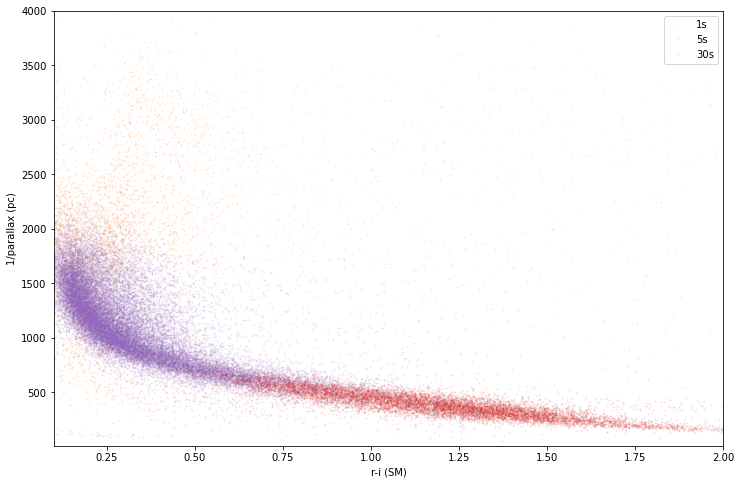

In [21]:
igood = (mag_i > bright30[3]) & (mag_r > bright30[2])
ishort = (mag_i > bright05[3]) & (mag_r > bright05[2]) & ((mag_i < bright30[3]) | (mag_r < bright30[2]))
iveryshort = (mag_i > bright01[3]) & (mag_r > bright01[2]) & ((mag_i < bright05[3]) | (mag_r < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(col_ri[iveryshort],distance[iveryshort],'.',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(col_ri[ishort],distance[ishort],'.',color='C4',markersize=2,label='5s',alpha=0.1)
plt.plot(col_ri[igood],distance[igood],'.',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r-i (SM)')
plt.ylabel('1/parallax (pc)')
plt.ylim(10,4000)
plt.xlim(0.1,2)
plt.legend();
#plt.savefig('LSST-Gaia-PS1-ri-distance.png');

Not much different than the PS1 data.  

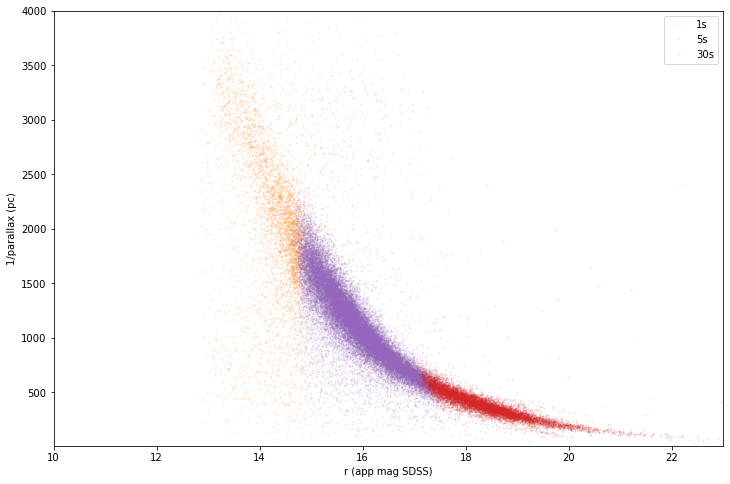

In [22]:
igood = (mag_i > bright30[3]) & (mag_r > bright30[2])
ishort = (mag_i > bright05[3]) & (mag_r > bright05[2]) & ((mag_i < bright30[3]) | (mag_r < bright30[2]))
iveryshort = (mag_i > bright01[3]) & (mag_r > bright01[2]) & ((mag_i < bright05[3]) | (mag_r < bright05[2]))
#
#plt.plot(col_ri,absmag_r,'k.',markersize=1,alpha=0.1)
plt.plot(mag_r[iveryshort],distance[iveryshort],'.',color='C1',markersize=2,label='1s',alpha=0.1)
plt.plot(mag_r[ishort],distance[ishort],'.',color='C4',markersize=2,label='5s',alpha=0.1)
plt.plot(mag_r[igood],distance[igood],'.',color='C3',markersize=2,label='30s',alpha=0.1)
plt.xlabel('r (app mag SDSS)')
plt.ylabel('1/parallax (pc)')
plt.ylim(10,4000)
plt.xlim(10,23)
plt.legend();
#plt.savefig('LSST-Gaia-PS1-mr-distance.png');

Maybe worth noting that we have limited ourselves to 50,000 sources (or fewer, depending on the notebook you ran) so rare objects would also be present.  